In [70]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
train = pd.read_csv('./data/kaggle/kaggle_house_train.csv')
test  = pd.read_csv('./data/kaggle/kaggle_house_test.csv')

In [50]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [51]:
# 결과에 가장 영향을 미치는게 무엇인지 찾기 위해
# 상관 플롯을 그리고, 상관계수가 높은것을 찾아서 한다.

In [52]:
# 문자열 데이터는 인코딩을 해야한다 -> 라벨인코딩, 원핫인코딩 등 -> 수치형으로 바꿈
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# 결측치 확인
# train.isna().sum()

In [9]:
# 가격을 예측하는 모델을 만드는 것이다
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [22]:
# 각 피처의 null 건 수 확인

type ( train.isnull().sum() )

series = train.isnull().sum()
series[series > 0].sort_values(ascending=False) # 얘네들이 null 값을 갖고 있다는 것을 알 수 있다.


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

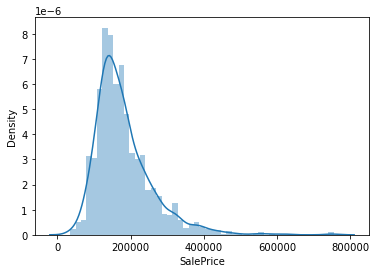

In [54]:
# 오른쪽으로 긴 꼬리형 --> 정규형이 아님 --> 타겟값에 대한 스케일링 필요 --> 타겟값은 로그 스케일링
sns.distplot(train['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

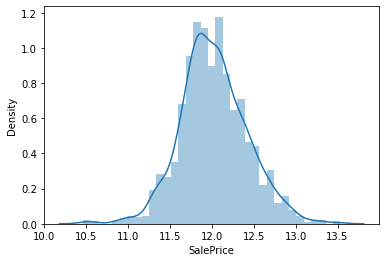

In [24]:
# 타겟의 스케일링 -> 로그변환
log_target = np.log1p(train['SalePrice'])
sns.distplot(log_target)

In [55]:
salePrice = train['SalePrice']
train['SalePrice'] = log_target
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [56]:
# 전처리

# null 값과 타입 추출
null_cnt = train.isnull().sum()[ train.isnull().sum() > 0 ]

# type(null_cnt.index) --> 행 이름 갖고온다.
# null_cnt.index

# 널 값이 들어있는 피처들과 그에 대한 타입을 갖고 온다.
train.dtypes[null_cnt.index]

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [57]:
# 문자컬럼은 삭제, 숫자 컬럼은 평균으로 대체

train.drop(['Id', 'Alley', 'MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2','Electrical', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
           axis = 1, inplace = True)

In [59]:
train.fillna(train.mean(), inplace=True)

In [60]:
train.isnull().sum().sum()

0

In [63]:
train.shape
# 이대로 학습 불가 -> object 값이 있어서 인코딩이 필요하다.

(1460, 64)

In [65]:
ohe_train = pd.get_dummies(train)
ohe_train.shape

(1460, 219)

In [67]:
ohe_null_cnt = ohe_train.isnull().sum()[ohe_train.isnull().sum() >0]
ohe_train.dtypes[ohe_null_cnt]

Series([], dtype: object)

In [68]:
ohe_train
# 각 피처별로 데이터의 단위가 다르다보니까 문제가 생길 수 있다.
# 따라서, 피처스케일링을 하기 전의 성능과 하고 나서 성능을 측정해보자

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [102]:
# 1. 피처 스케일링과 교차검증없이 모델 생성 - 학습 - 예측 - 평가
target = ohe_train['SalePrice']
features = ohe_train.drop('SalePrice', axis=1, inplace=False)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

price_model = LinearRegression()
price_model.fit(X_train, y_train)

# 미지의 데이터를 넣어서 예측
y_pred = price_model.predict(X_test)

In [98]:
print('mae  : ', mean_absolute_error(y_test, y_pred))
print('mse  : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)) )
# 결정계수 R
print('R    :', price_model.score(features, target))

mae  :  0.09154877722350302
mse  :  0.024321164340542434
rmse :  0.15595244256036014
R    : 0.9287401386156117


In [105]:
# 2. 피처스케일링 후 모델 생성 - 학습 - 예측 - 평가
# standardScaler 확인
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scaler = StandardScaler()
features = std_scaler.fit_transform(features)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

feature_scaling_price_model = LinearRegression()
feature_scaling_price_model.fit(X_train, y_train)

y_pred = price_model.predict(X_test)

print('mae  : ', mean_absolute_error(y_test, y_pred))
print('mse  : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)) )
# 결정계수 R
print('R    :', price_model.score(features, target))

mae  :  3.3231555476605164
mse  :  17.523336820589034
rmse :  4.186088486951635
R    : -133.4246198270733


In [113]:
# minmaxscaler 확인
target = ohe_train['SalePrice']
features = ohe_train.drop('SalePrice', axis=1, inplace=False)

In [115]:
minmax_scaler = MinMaxScaler(feature_range=(0,1))
features = minmax_scaler.fit_transform(features)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

feature_scaling_price_model = LinearRegression()
feature_scaling_price_model.fit(X_train, y_train)

y_pred = price_model.predict(X_test)

print('mae  : ', mean_absolute_error(y_test, y_pred))
print('mse  : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)) )
# 결정계수 R
print('R    :', price_model.score(features, target))

mae  :  2.227870780776387
mse  :  5.094385028210224
rmse :  2.2570744401127367
R    : -30.856896078763256


In [118]:
# 교차검증을 통한 모델 생성 - 학습 - 예측 - 평가

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

In [120]:
target = ohe_train['SalePrice']
features = ohe_train.drop('SalePrice', axis=1, inplace=False)

In [121]:
# 5개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=20)
cv_accuracy = []
n_iter = 0
dt_clf = DecisionTreeClassifier()

# KFold객체의 split() 호출하면 폴드별 학습용, 검증용 각각의 로우 인덱스를 array로 반환한다.  
for train_index, test_index  in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 

KeyError: "None of [Int64Index([  73,   74,   75,   76,   77,   78,   79,   80,   81,   82,\n            ...\n            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],\n           dtype='int64', length=1387)] are in the [columns]"